In [3]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
y=df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [9]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [25]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [33]:
rf_result=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()

In [35]:
rf_result.columns=['Methods','rf_train_mse','rf_train_r2','rf_test_mse','rf_test_r2']

In [36]:
rf_result

,Methods,rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


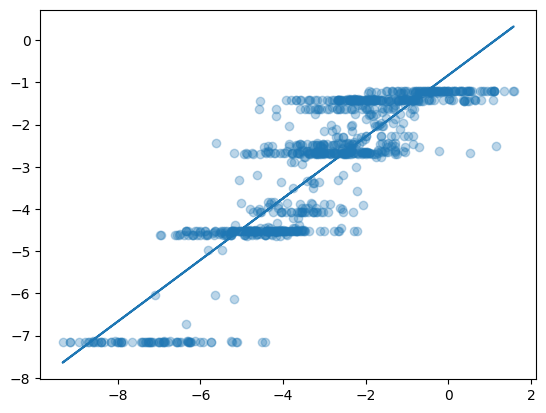

In [42]:
import matplotlib.pyplot as pyp
import numpy as np

pyp.scatter(x=y_train,y=y_rf_train_pred, alpha = 0.3)
pyp.plot()

line = np.polyfit(y_train,y_rf_train_pred,1)
pl=np.poly1d(line)
pyp.plot(y_train,pl(y_train))